In [1]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np

In [2]:
X,y = make_blobs(n_samples=1500,cluster_std=[1.0,3.5,0.5],random_state=42)

In [3]:
print(X)

[[ 4.16979824  4.81099864]
 [-6.99482755 -7.34222617]
 [-6.62969513 -7.57976268]
 ...
 [11.6867342   2.45104334]
 [-6.76697323 -7.06487306]
 [11.23593091  7.37452203]]


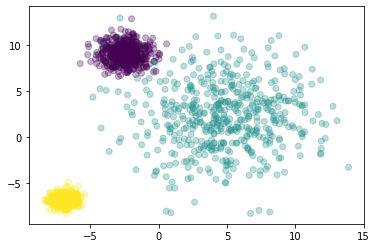

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,alpha=0.3)

In [5]:
#initialize values
m,n = X.shape
K = 3
max_iter = 20

#initialize r to 1/k for each m (m,k)
r = np.full((m,K),1/K)

#initialize pi for all k (k)
pi = np.full((K),1/K)

#initialize mean (n,k)
mean = np.random.uniform(-10,10,size=(n,K))

#initialize cov (k,n,n)
cov = np.empty((K,n,n))
cov[:] = np.eye(n).astype(float)

Text(0.5, 1.0, 'Final')

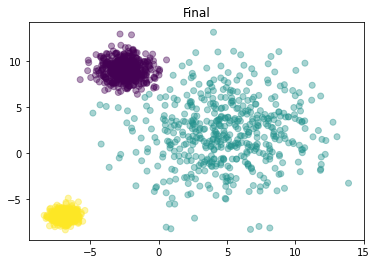

In [9]:
for iteration in range(max_iter):
    #get the responsibility for each sample
    for i in range(m):
        for k in range(K):
            #compute the parameters of a normal distribution using scipy.stats.multivariate_normal
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i,k] = pi[k] * xi_pdf
        r[i] = r[i]/np.sum(r[i])
 #   r = (r.T/np.sum(r,axis=1)).T
    
    Nk = np.sum(r,axis=0)
    
    #compute new pi
    pi = Nk/m
    
    #compute new mean
    mean = (X.T@r)/Nk

    #compute new covariance
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:,k]).reshape(-1,1)
            cov[k] += r[i,k]*(X_mean@X_mean.T)
        cov[k] /= Nk[k]
            
yhat = np.argmax(r,axis=1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat,alpha=0.4)
plt.title("Final")

In [7]:
print(cov)

[[[ 9.33178271e-01 -4.45377370e-02]
  [-4.45377370e-02  1.02675391e+00]]

 [[ 1.11360371e+01  4.69510283e-01]
  [ 4.69510283e-01  1.30878949e+01]]

 [[ 2.41574193e-01  1.07846515e-02]
  [ 1.07846515e-02  2.44810699e-01]]]


In [8]:
print(mean)

[[-2.50841076  4.83739005 -6.88319929]
 [ 9.04729595  2.2319549  -6.86937757]]
